                                    Sum
patient student                        
0       asklyarova@stonybrook.edu   0.0
        chaotsai@stonybrook.edu     0.0
        pstdenis@stonybrook.edu     0.0
        shuwyang@stonybrook.edu     0.0
1       chaotsai@stonybrook.edu     0.0
        vlgarcia@stonybrook.edu    12.0
2       chaotsai@stonybrook.edu     0.0
        ikleiman@stonybrook.edu     0.0
        vlgarcia@stonybrook.edu     0.0
3       chaotsai@stonybrook.edu     6.0
        ikleiman@stonybrook.edu     6.0
4       chaotsai@stonybrook.edu     0.0
        vlgarcia@stonybrook.edu     0.0
class accuracy: 23.08%


scenario performance
patient 0: 0.00%
patient 1: 50.00%
patient 2: 0.00%
patient 3: 100.00%
patient 4: 0.00%




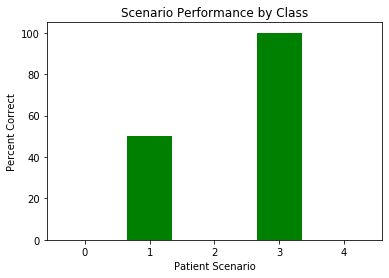



performance by medication group within each scenario
pt case:  0
medication group_4: 25.00%
medication group_6: 100.00%
medication group_2: 50.00%
medication group_5: 25.00%
medication group_1: 25.00%
medication group_7: 100.00%
medication group_3: 50.00%


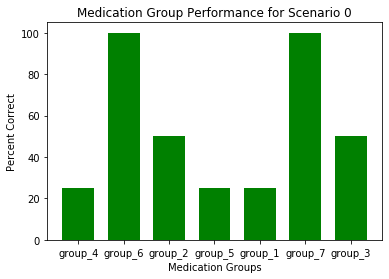

pt case:  1
medication group_4: 50.00%
medication group_6: 100.00%
medication group_2: 100.00%
medication group_5: 100.00%
medication group_1: 100.00%
medication group_7: 100.00%
medication group_3: 100.00%


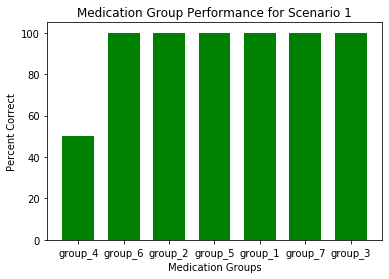

pt case:  2
medication group_4: 0.00%
medication group_2: 33.33%
medication group_5: 100.00%
medication group_1: 33.33%
medication group_3: 66.67%


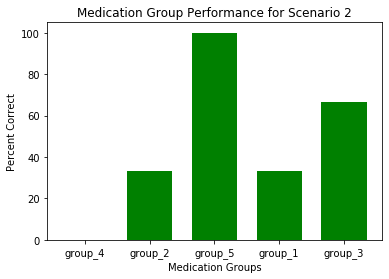

pt case:  3
medication group_1: 100.00%
medication group_4: 100.00%
medication group_3: 100.00%
medication group_2: 100.00%


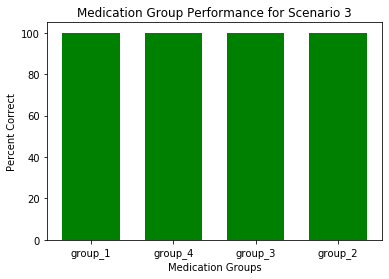

pt case:  4
medication group_1: 50.00%
medication group_4: 50.00%
medication group_3: 100.00%
medication group_2: 100.00%


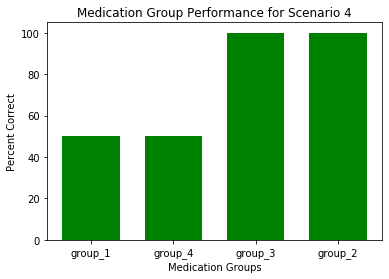



student's overall performance
pstdenis@stonybrook.edu: 0.00% of patients
ikleiman@stonybrook.edu: 50.00% of patients
asklyarova@stonybrook.edu: 0.00% of patients
chaotsai@stonybrook.edu: 20.00% of patients
vlgarcia@stonybrook.edu: 33.33% of patients
shuwyang@stonybrook.edu: 0.00% of patients


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import requests

r = requests.get(url = "https://apps.tlt.stonybrook.edu/reconciliation/api/public2/generate_master_doc", params = {"download": "true"} ) 
master_data = r.text

# class accuracy
df = pd.read_csv(StringIO(master_data))
df = df.groupby(by=['patient', 'student'])['trial correct'].agg(Sum = 'sum')
a = df[df['Sum'] > 0.0]
aa = a.shape[0]
b= df[df['Sum'] == 0.0]
bb = b.shape[0]
c = aa/(aa+bb) * 100
print('class accuracy: {:0.2f}%'.format(c))

print('\n')

#accuracy by patient scenario, aka Scenario Performance by Class
df = pd.read_csv(StringIO(master_data))
all_pts = set(df['patient'])
print('scenario performance')
scenario_xcoord = list(range(1,len(all_pts)+1))
scenario_y = []
scenario_ticks = []
for pt in all_pts:
    mini = df[df['patient'] == pt]
    mini = mini.groupby(by=['student'])['trial correct'].agg(Sum = 'sum')
    a = mini[mini['Sum'] > 0.0]
    aa = a.shape[0]
    b = mini[mini['Sum'] == 0.0]
    bb = b.shape[0]
    c = aa/(aa+bb) * 100
    scenario_y.append(c)
    scenario_ticks.append(pt)
    print('patient {}: {:0.2f}%'.format(pt,c))


print('\n')

plt.bar(scenario_xcoord, scenario_y, tick_label = scenario_ticks, 
        width = 0.7, color = ['green']) 
plt.title('Scenario Performance by Class')   
plt.ylabel('Percent Correct') 
plt.xlabel('Patient Scenario') 
plt.show() 

print('\n')

#accuracy by medication group within each scenario
df = pd.read_csv(StringIO(master_data))
all_pts = set(df['patient'])
print('performance by medication group within each scenario')
group_y = []
group_ticks = []
for pt in all_pts:
    print('pt case: ',pt)
    mini = df[df['patient'] == pt]
    all_groups = set(mini['group'])
    group_xcoord = list(range(1,len(all_groups)+1))
    for group in all_groups:
        group_ticks.append(group)
        mini_2 = mini[mini['group'] == group]
        mini_2 = mini_2.groupby(by=['group','student'])['group correct'].agg(Sum = 'sum', Count='count')  
        a = mini_2[mini_2['Sum'] > 0.0]  
        aa = a.shape[0]
        b = mini_2[mini_2['Sum'] == 0.0]
        bb = b.shape[0]
        c = aa/(aa+bb) * 100
        group_y.append(c)
        print('medication {}: {:0.2f}%'.format(group,c))
    plt.title('Medication Group Performance for Scenario {}'.format(pt))   
    plt.ylabel('Percent Correct') 
    plt.xlabel('Medication Groups') 
    plt.bar(group_xcoord, group_y, tick_label = group_ticks, 
        width = 0.7, color = ['green']) 
    plt.show()
    group_y = []
    group_ticks = []
    group_xcoord = []

print('\n')

#accuracy by student
df = pd.read_csv(StringIO(master_data))
all_stdns = set(df['student'])
print("student's overall performance")
for stdn in all_stdns:
    mini_3 = df[df['student'] == stdn]
    mini_3 = mini_3.groupby(by=['patient'])['trial correct'].agg(Sum = 'sum')
    a = mini_3[mini_3['Sum'] > 0.0]
    aa = a.shape[0]
    b = mini_3[mini_3['Sum'] == 0.0]
    bb = b.shape[0]
    c = aa/(aa+bb) * 100
    print('{}: {:0.2f}% of patients'.format(stdn,c))